In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Public Pension Risk in the US

## Data
The data used for this report is from the new Public Plans Database (PPD) constructed by the Center for Retirement Research at Boston College, the U.S. Census Bureau, the NCSL, and the Current Population Survey (CPS). It contains the data since 2001 for 95% of the public sector members.
## Question to answer
How do macroeconomic shocks and public health shocks differentially affect the funding position of U.S. public pension plans, and through which actuarial channels (assets, liabilities, and contributions) do these effects operate?



In [32]:
pension_df = pd.read_csv("pension_data.csv", encoding="cp1252")
pension_df = pension_df[pension_df["fy"] > 2000]
pd.set_option("display.max_columns", None)
pension_df.head()

/var/folders/tr/w9p9c_hx39j1vrtknn93nc0c0000gn/T/ipykernel_88999/4151004807.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  pension_df = pd.read_csv("pension_data.csv", encoding="cp1252")


,ppd_id,PlanName,fy,system_id,PlanFullName,source_PlanBasics,FiscalYearType,PlanInceptionYear,PlanClosed,PlanYearClosed,AdministeringGovt,StateAbbrev,StateName,GovtName,PlanType,EmployeeTypeCovered,SocSecCovered,SocSecCovered_verbatim,CostStructure,EmployerType,CostSharing,BenefitsWebsite,EEGroupID,TierID,ActRptDate,fye,ActCostMeth_GASB,AssetValMeth_GASB,FundingMeth_GASB,InflationAssumption_GASB,InvestmentReturnAssumption_GASB,ActCostMethCode_GASB,AssetValMethCode_GASB,AssetSmoothingPeriod_GASB,FundingMethCode1_GASB,FundingMethCode2_GASB,UAALAmortPeriod_GASB,BlendedDiscountRate,AssetValMeth,PhaseIn,AssetValMeth_note,ActCostMeth,ActCostMeth_note,FundingMeth,FundingMeth_note,MktAssets_Smooth,ActAssets_Smooth,NetFlows_smooth,AssetValMethCode,SmoothingReset,GainlossConcept,GainLossBase_1,GainLossBase_2,GainLoss,GainLossPeriod,PhaseInPercent,PhaseInPeriods,PhaseInType,GainLossRecognition,AssetSmoothingBaseline,ExpectedReturnMethod,AddSubtractGainLoss,UpperCorridor,LowerCorridor,ActCostMethCode,FundMethCode_1,FundMethCode_2,PayrollGrowthAssumption,TotAmortPeriod,RemainingAmortPeriod,UAALYearEstablished,WageInflation,ActAssets_GASB,ActLiabilities_GASB,ActFundedRatio_GASB,UAAL_GASB,ActLiabilities_other,payroll,RequiredContribution,PercentReqContPaid,TotalPensionLiability,NetPosition,NetPensionLiability,ActAssets_est,ActLiabilities_est,ActFundedRatio_est,RequiredContribution_est,ActFundedRatio_GASB67,InvestmentConsultantName,InvestmentConsultantCode,InvestmentReturn_1yr,InvestmentReturn_2yr,InvestmentReturn_3yr,InvestmentReturn_4yr,InvestmentReturn_5yr,InvestmentReturn_7yr,InvestmentReturn_8yr,InvestmentReturn_10yr,InvestmentReturn_12yr,InvestmentReturn_15yr,InvestmentReturn_20yr,InvestmentReturn_25yr,InvestmentReturn_30yr,InvestmentReturn_LongTerm,InvestmentReturn_LTStartYear,GrossReturns,GeoReturn_est,GeoGrowth_est,InvestmentReturn_1yr_est,InvestmentReturn_5yr_est,InvestmentReturn_10yr_est,AvgReturn_3yr,AvgReturn_5yr,AvgReturn_10yr,expense_SecLendMgmtFees,contrib_EE_regular,contrib_ER_regular,contrib_ER_state,contrib_EE_PurchaseService,contrib_EE_other,contrib_ER_other,contrib_other,POB_Flag,POB_Amount,contrib_tot,FairValueChange_investments,FairValueChange_RealEstate,income_interest,income_dividends,income_InterestAndDividends,income_RealEstate,income_PrivateEquity,income_alternatives,income_international,income_OtherInvestments,expense_RealEstate,expense_PrivateEquity,expense_alternatives,expense_OtherInvestments,expense_investments,FVChange_SecLend,income_SecuritiesLending,expense_SecuritiesLending,income_SecuritiesLendingRebate,FVChange_SecLend_UG,income_OtherAdditions,income_net,expense_TotBenefits,expense_RetBenefits,expense_DisabilityBenefits,expense_DeathBenefits,expense_DROPBenefits,expense_SurvivorBenefits,expense_COLABenefits,expense_LumpSumBenefits,expense_OtherBenefits,expense_refunds,expense_AdminExpenses,expense_Depreciation,expense_OtherDeductions,expense_net,adjustment_MktAssets,MktAssets_net,BegMktAssets_net,contrib_ER_tot,contrib_other_tot,FairValueChange_tot,income_interest_dividends_tot,expense_investments_tot,SecLend_tot,investments_net,expense_other_tot,ContributionFY,ActuarialFirm,ActuarialFirmCode,NormCostRate_tot,NormCostRate_EE,NormCostRate_ER,ReqContRate_ER,ReqContRate_tot,ReqContRate_ER_Stat,ReqContRate_tot_Stat,NormCostAmount_tot,NormCostAmount_EE,NormCostAmount_ER,ReqContAmount_ER,ReqContAmount_tot,ReqContAmount_ER_Stat,ReqContAmount_tot_Stat,NormCostRate_tot_est,NormCostRate_EE_est,NormCostRate_ER_est,ReqContRate_ER_est,ProjectedPayroll,UAALRate,beneficiaries_DisabilityRetirees,beneficiaries_DependentSurvivors,actives_tot,ActiveSalaries,ActiveAge_avg,ActiveTenure_avg,ActiveSalary_avg,InactiveVestedMembers,InactiveNonVested,beneficiaries_tot,benefits_tot,BeneficiaryAge_avg,BeneficiaryBenefit_avg,beneficiaries_ServiceRetirees,benefits_ServiceRetirees,ServiceRetireeAge_avg,ServiceRetireeBenefit_avg,ServiceRetAge_avg,ServiceRetTenure_avg,benefits_DisabilityRetirees,beneficiaries_survivors,beneficiaries_Spo

## Discussion
### 1. Funded Ratio

One of the core concepts in retirement actuarial work is the funded ratio. It reflects "a pension fund’s current financial position" (DeNederlandscheBank).\
In general, funded ratio $= \frac{\text{Actuarial Value of Assets}}{\text{Actuarial Value of Liability}}$. We draw the following plot to see how did the funded ratio of US public pension plan change over time.

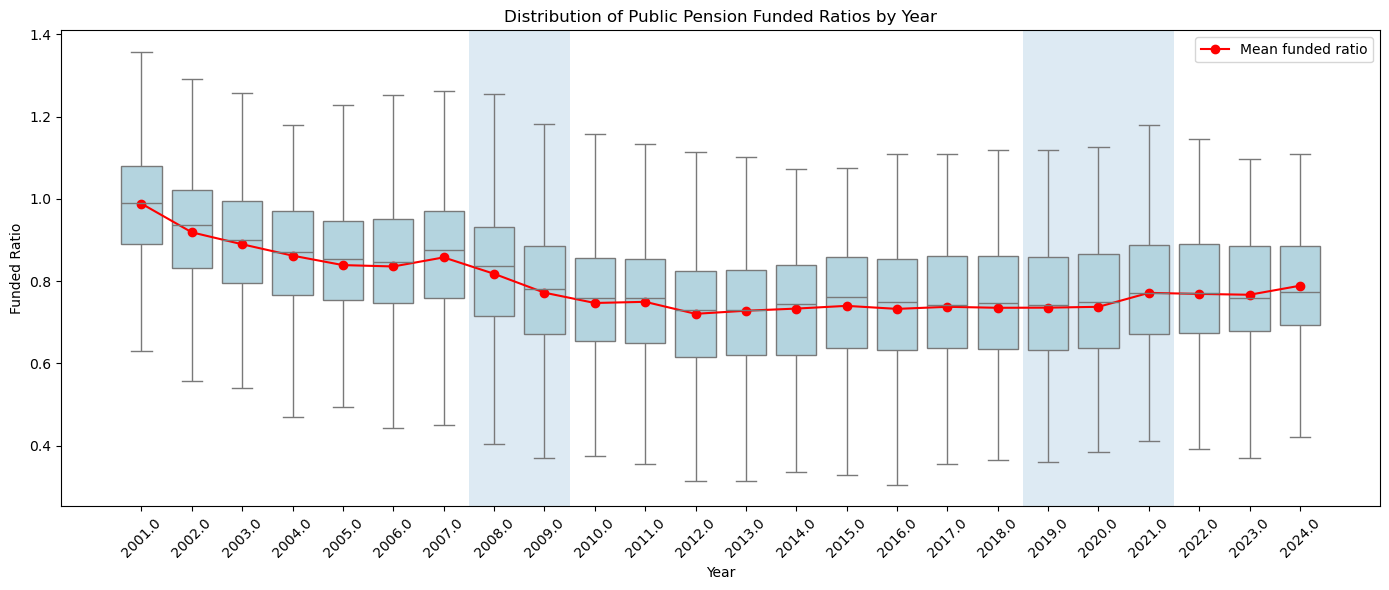

In [3]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=pension_df,
    x="fy",
    y="ActFundedRatio_GASB",
    color="lightblue",
    showfliers=False
)
mean_by_year = (
    pension_df.groupby("fy")["ActFundedRatio_GASB"]
      .mean()
      .reset_index()
)
plt.plot(
    range(len(mean_by_year)),
    mean_by_year["ActFundedRatio_GASB"],
    color="red",
    marker="o",
    label="Mean funded ratio"
)
years = mean_by_year["fy"].tolist()
x_2008 = years.index(2008)
x_2019 = years.index(2019)

plt.axvspan(x_2008 - 0.5, x_2008 + 1.5, alpha=0.15)
plt.axvspan(x_2019 - 0.5, x_2019 + 2.5, alpha=0.15)


plt.xlabel("Year")
plt.ylabel("Funded Ratio")
plt.legend()
plt.title("Distribution of Public Pension Funded Ratios by Year")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above, we observe a broad downward shift in the distribution of funded ratios following the 2008 financial crisis, reflected in declines across the interquartile range as well as in the mean funded ratio. This suggests that the deterioration in funding levels was systemic rather than plan-specific, driven by widespread asset losses and insufficient contribution adjustments. Notably, the aggregate funded ratio has not returned to its pre-crisis (2007) level, indicating the presence of persistent structural funding shortfalls rather than a purely cyclical shock.

In contrast, since the onset of the COVID-19 period in 2019, the mean funded ratio exhibits a gradual upward trend, which may caused by the high inflation.

### 2. Inflation-adjusted UAAL
Therefore, we will calculate the inflation adjusted UAAL to compare the Unfunded Actuarial Accrued Liability during these two shock period.
For the inflation, we will use the CPI-U dataset published by BLS.

In [19]:
cpi_df = pd.read_excel("historical-cpi-u-202512.xlsx")
cpi_df["Year"] = pd.to_numeric(cpi_df["Year"], errors="coerce")
cpi_df = cpi_df[cpi_df["Year"] > 2000]
cpi_df = cpi_df.drop(columns=["Indent Level"])
cpi_df["Oct."] = pd.to_numeric(cpi_df["Oct."], errors="coerce")

In [ ]:
months = ["Jan.","Feb.","Mar.","Apr.","May","Jun.","Jul.","Aug.","Sep.","Oct.","Nov.","Dec."]
cpi_df["CPI_annual_avg"] = cpi_df[months].mean(axis=1)\

In [52]:
cpi_df["CPI_pct_change"] = cpi_df["CPI_annual_avg"].pct_change() * 100


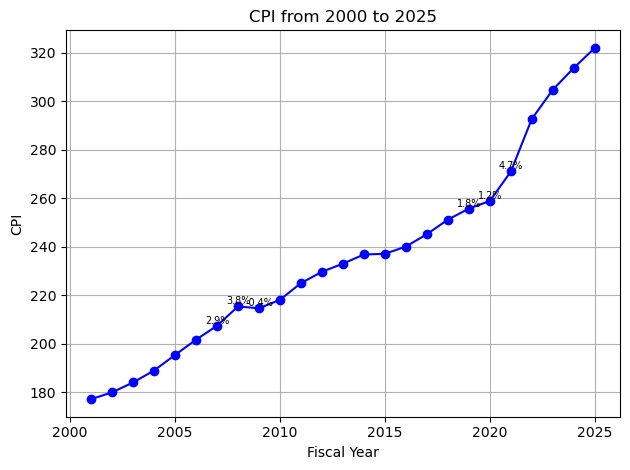

In [59]:
plt.plot(
    cpi_df["Year"],
    cpi_df["CPI_annual_avg"],
    color="blue",
    marker="o"
)
for i in range(1, len(cpi_df)):
    if cpi_df["Year"].iloc[i] in [2007, 2008, 2009, 2019,2020,2021]:
        plt.text(
        cpi_df["Year"].iloc[i],
        cpi_df["CPI_annual_avg"].iloc[i],
        f'{cpi_df["CPI_pct_change"].iloc[i]:.1f}%',
        fontsize=7,
        ha='center',
        va='bottom'
    )
plt.title("CPI from 2000 to 2025")
plt.xlabel("Fiscal Year")
plt.ylabel("CPI")
plt.tight_layout()
plt.grid(True)
plt.show()

We picked 2024 as our base year as it is the latest one in the public pension plan dataset.

In [ ]:
pension_df["UAAL_nominal"] = pension_df["UAAL_GASB"]
cpi_base = cpi_df.loc[cpi_df["Year"] == 2024, "CPI_annual_avg"].iloc[0]
pension_df = pension_df.merge(
    cpi_df[["Year", "CPI_annual_avg"]],
    left_on="fy",
    right_on="Year",
    how="left"
)
pension_df["UAAL_real"] = (pension_df["UAAL_GASB"]* cpi_base/ pension_df["CPI_annual_avg"])



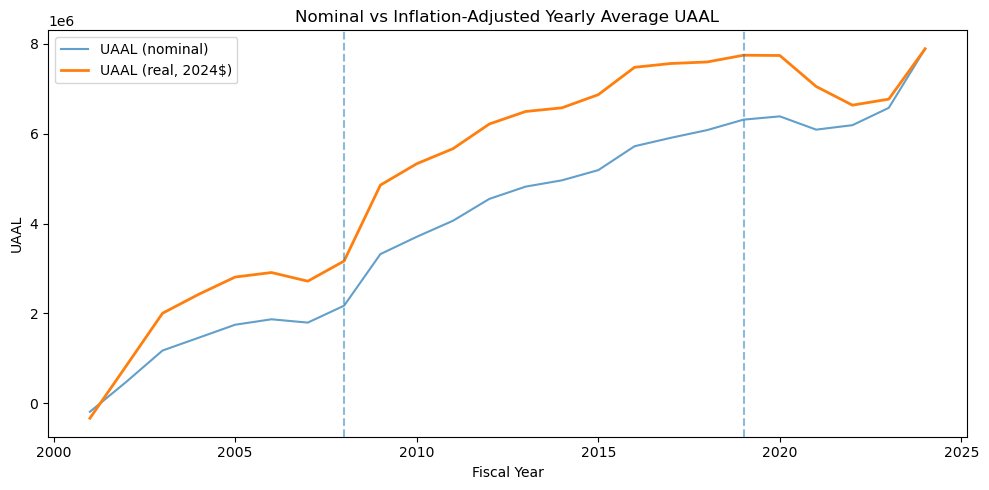

In [38]:
uaal_by_year = (
    pension_df
    .groupby("fy")[["UAAL_GASB", "UAAL_real"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))

plt.plot(
    uaal_by_year["fy"],
    uaal_by_year["UAAL_GASB"],
    label="UAAL (nominal)",
    alpha=0.7
)

plt.plot(
    uaal_by_year["fy"],
    uaal_by_year["UAAL_real"],
    label="UAAL (real, 2024$)",
    linewidth=2
)

plt.axvline(2008, linestyle="--", alpha=0.5)
plt.axvline(2019, linestyle="--", alpha=0.5)

plt.title("Nominal vs Inflation-Adjusted Yearly Average UAAL")
plt.xlabel("Fiscal Year")
plt.ylabel("UAAL")
plt.legend()
plt.tight_layout()
plt.show()


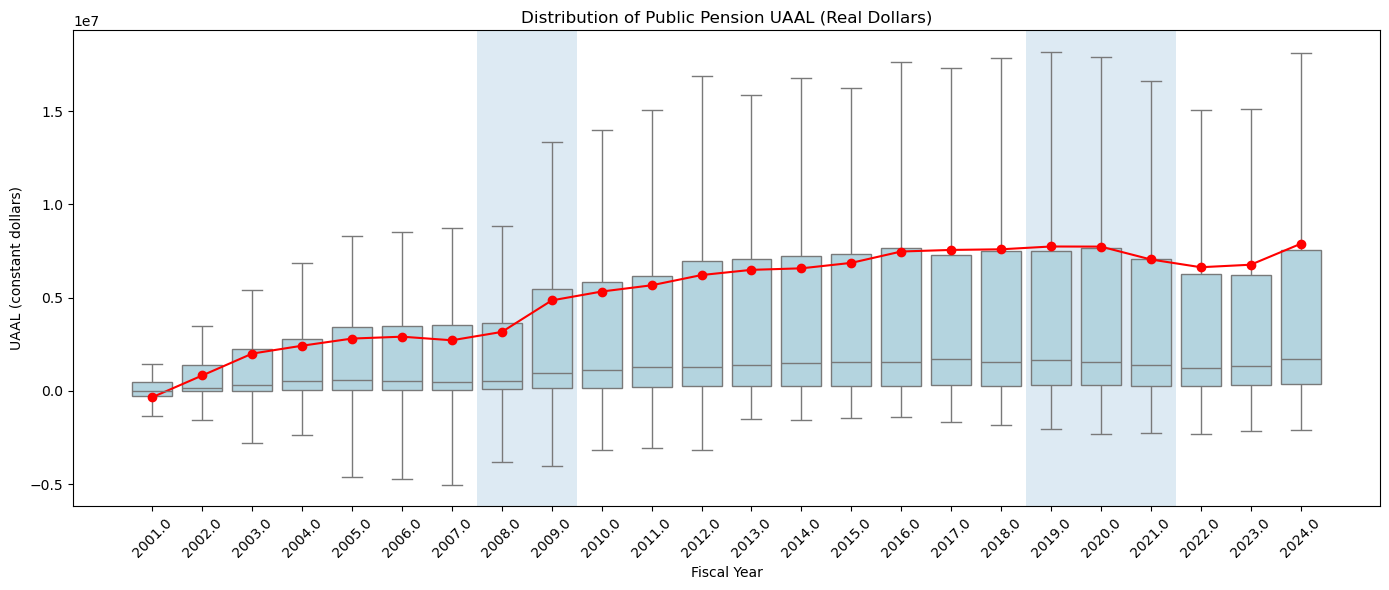

In [46]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=pension_df,
    x="fy",
    y="UAAL_real",
    color="lightblue",
    showfliers=False
)
mean_by_year_uaal = (
    pension_df.groupby("fy")["UAAL_real"]
      .mean()
      .reset_index()
)
plt.plot(
    range(len(mean_by_year_uaal)),
    mean_by_year_uaal["UAAL_real"],
    color="red",
    marker="o",
    label="Mean Real UAAL"
)
plt.title("Distribution of Public Pension UAAL (Real Dollars)")
plt.xlabel("Fiscal Year")
plt.ylabel("UAAL (constant dollars)")

plt.axvspan(x_2008 - 0.5, x_2008 + 1.5, alpha=0.15)
plt.axvspan(x_2019 - 0.5, x_2019 + 2.5, alpha=0.15)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- 2008 financial crisis:
There is a sharp upward shift in the entire distribution of real UAAL. The widening boxes and longer upper whiskers suggest that the shock was systemic, affecting many plans rather than a small subset. This reflects large asset losses that were not offset by inflation, confirming a genuine deterioration in funding. Despite market recovery, the distribution does not return to pre-2008 levels, pointing to structural underfunding rather than a temporary shock.
- COVID19:
Although CPI inflation spikes in 2021, the real UAAL does not fall sharply.
This shows that post-COVID improvements in nominal funding metrics are partly offset once inflation is removed.
The slight dip in the mean around 2021–2022 likely reflects strong asset performance, but the distribution remains wide, indicating uneven recovery across plans.

### 3. Total Contribution
Total contribution is made up of employer regular contributions and employee regular contributions. It indicates the annual cash inflow used to fund pension benefit accruals and amortize existing unfunded liabilities.

In [73]:
pension_df["Employer_Contribution"] = pension_df["contrib_ER_regular"].fillna(0)
pension_df["Employee_Contribution"] = pension_df["contrib_EE_regular"].fillna(0)

pension_df["Total_Contribution"] = (
    pension_df["Employer_Contribution"]
    + pension_df["Employee_Contribution"]
)

req_by_year = (
    pension_df[pension_df["fy"] < 2024]
    .groupby("fy")["Total_Contribution"]
    .sum()
    .reset_index()
)
req_by_year["pct_change"] = (
    req_by_year["Total_Contribution"].pct_change() * 100
)

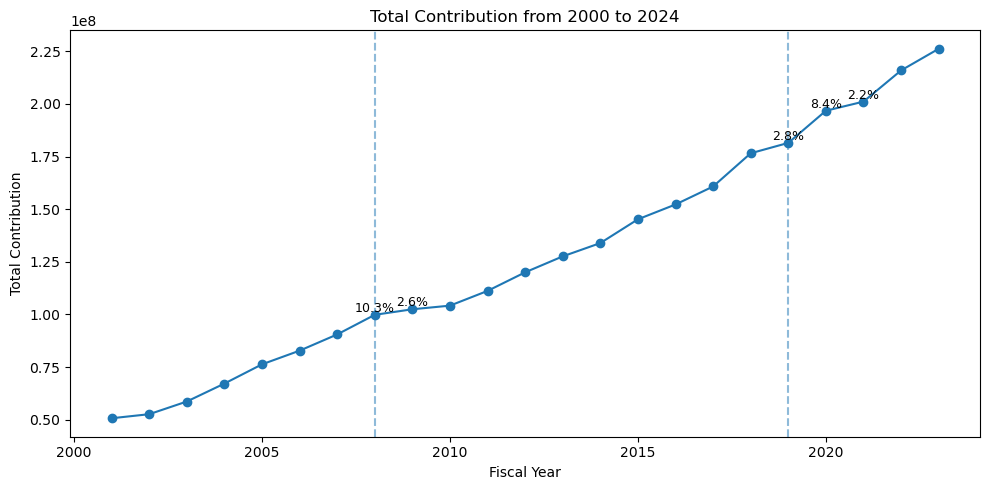

In [74]:
plt.figure(figsize=(10,5))
plt.plot(
    req_by_year["fy"],
    req_by_year["Total_Contribution"],
    marker="o"
)

for year in [2008, 2009, 2019, 2020,2021]:
    row = req_by_year[req_by_year["fy"] == year]
    if not row.empty:
        plt.text(
            year,
            row["Total_Contribution"].iloc[0],
            f'{row["pct_change"].iloc[0]:.1f}%',
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.axvline(2008, linestyle="--", alpha=0.5)
plt.axvline(2019, linestyle="--", alpha=0.5)

plt.title("Total Contribution from 2000 to 2024")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Contribution")
plt.tight_layout()
plt.show()


Although UAAL worsened sharply during both crises, total contributions adjusted only gradually, suggesting that contribution policy responds with a delay to sudden market-driven deterioration in pension funding. This smooth trajectory reflects the lagged and smoothed nature of actuarial funding policies, under which contribution increases are phased in over time rather than adjusted abruptly.

## Conclusion
This project examines how major economic and public health shocks have affected the funding position of U.S. public pension plans since 2001, using data from the Public Plans Database. The analysis compares the 2008 financial crisis and the COVID period through three actuarial channels: funded ratios, inflation-adjusted unfunded actuarial accrued liabilities (UAAL), and total contributions. Results show that the 2008 financial crisis caused a sharp and persistent deterioration in funding, reflected in a sustained increase in real UAAL and a downward shift in funded ratio distributions. While funded ratios and nominal UAAL appear to improve following COVID, inflation-adjusted UAAL remains elevated, indicating that recent improvements overstate true funding recovery. In contrast, total contributions rise smoothly across both crises, highlighting the lagged and smoothed nature of actuarial funding policies. Together, these findings suggest that public pension funding stress is driven primarily by asset shocks, with policy responses adjusting gradually over time rather than reacting immediately to economic disruptions.